In [1]:
import numpy as np
import tensorflow as tf
import time
from memory_profiler import memory_usage
import matplotlib.pyplot as plt

2024-04-21 22:08:04.560455: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def fft_convolution(image, kernel):
    # Pad the kernel to be the same size as the image
    kernel_padded = np.zeros_like(image)
    k_height, k_width = kernel.shape
    kernel_padded[:k_height, :k_width] = kernel
    
    # Take FFT of the padded kernel and the image
    fft_image = np.fft.fft2(image)
    fft_kernel = np.fft.fft2(kernel_padded)
    
    # Element-wise multiplication
    fft_product = fft_image * fft_kernel
    
    # Inverse FFT to get the convolution result
    result = np.fft.ifft2(fft_product).real

    # Crop the result if needed to remove padding effects
    return result[:image.shape[0] - k_height + 1, :image.shape[1] - k_width + 1]

In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

In [4]:
time_records = []
memory_records = []

# Process only the first 20 images
for image in train_images[:50]:
    start_time = time.time() 
    mem_usage = memory_usage((fft_convolution, (image, kernel)), interval=0.1, timeout=1)
    time_taken = time.time() - start_time  # Time taken 

    time_records.append(time_taken)
    memory_records.append(max(mem_usage) - min(mem_usage))  # Max memory used 

# Compute average time and memory usage
average_time = np.mean(time_records)
average_memory = np.mean(memory_records)

print(f"Average Time: {average_time:.5f} seconds")
print(f"Average Memory: {average_memory:.5f} MB")

Average Time: 3.05650 seconds
Average Memory: 0.00031 MB


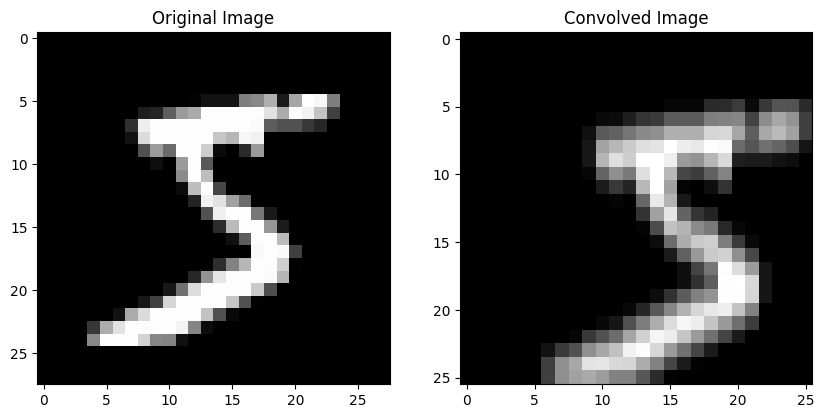

In [5]:
output_image = fft_convolution(train_images[0], kernel)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(train_images[0], cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(output_image, cmap='gray')
plt.title('Convolved Image')
plt.show()